In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [10]:
#here we read the dataset that we going to work with
df = pd.read_csv(r'C:\Users\KING\Documents\our langages\Projects\ecommerce_sales\women_clothing_ecommerce_sales.csv')
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [12]:
#here we changed the type of the order_date and extract the year and month from it

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S.%f')
df['month']= df['order_date'].dt.month
df['year']=df['order_date'].dt.year


In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    527 non-null    int64         
 1   order_date  527 non-null    datetime64[ns]
 2   sku         527 non-null    object        
 3   color       527 non-null    object        
 4   size        490 non-null    object        
 5   unit_price  527 non-null    int64         
 6   quantity    527 non-null    int64         
 7   revenue     527 non-null    int64         
 8   month       527 non-null    int64         
 9   year        527 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 41.3+ KB


,order_id,order_date,sku,color,size,unit_price,quantity,revenue,month,year
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,6,2022
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,6,2022
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228,6,2022
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,6,2022
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,6,2022


In [14]:
df['size'].isna().sum()

37

In [20]:
# we find the common value in our size field
df['size'].mode()

0    XL
Name: size, dtype: object

In [15]:
# here we solved the missing values with the mode value
df.fillna('XL' , inplace = True)
df['size'].isna().sum()

0

In [16]:
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue,month,year
0,1,2022-06-01 16:05:00,708,Dark Blue,2XL,298,1,298,6,2022
1,1,2022-06-01 16:05:00,89,Dark Blue,2XL,258,1,258,6,2022
2,2,2022-06-10 17:03:00,bobo,Cream,One Size,228,1,228,6,2022
3,3,2022-06-10 19:59:00,799,Dark Blue,XL,264,1,264,6,2022
4,4,2022-06-11 11:42:00,799,Dark Blue,M,264,1,264,6,2022


In [17]:
df['size'].value_counts()

XL          201
M            92
L            91
One Size     45
2XL          43
3XL          40
4XL           9
One SIze      5
S             1
Name: size, dtype: int64

In [18]:
# here we replace the mispelling word with the correct one
df['size'].replace('One SIze' , 'One Size' , inplace = True)
df['size'].value_counts()

XL          201
M            92
L            91
One Size     50
2XL          43
3XL          40
4XL           9
S             1
Name: size, dtype: int64

In [21]:
df[['color','quantity']].groupby(['color']).sum().sort_values(by = 'quantity' , ascending= False)

,quantity
color,
Dark Blue,401
Light Blue,26
Black,15
Grey Wash,9
Mid Wash,8
Navy Blue,7
B,6
Dark Wash,5
Blue,4


Text(0.5, 1.0, 'Color base_on Quantity')

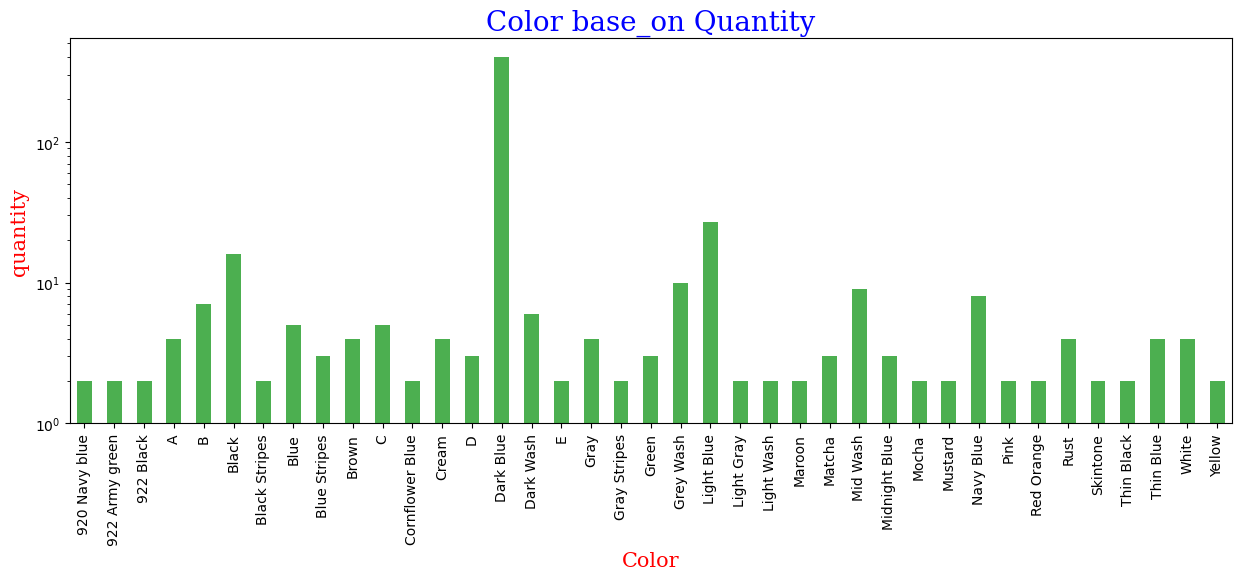

In [23]:
# showing the highest ordered colors according to the quantity
highest_color = df.groupby(['color']).quantity.sum()

plt.figure(figsize = (15, 5))
highest_color.plot(kind='bar' , color = "#4CAF50" ,log = True)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.xlabel('Color', fontdict= font2)
plt.ylabel('quantity' , fontdict=font2)
plt.title('Color base_on Quantity' , fontdict= font1)

sku
127        3
1499       2
1719       8
218        7
229        2
239       16
2499       4
29         1
3081       5
339        4
3799       9
439        1
539        2
61399      4
628        1
708       99
77        16
79         9
799      287
8499       3
89        13
897        3
9699      17
bobo      17
Name: quantity, dtype: int64


Text(0.5, 1.0, 'SKU base_on Quantity')

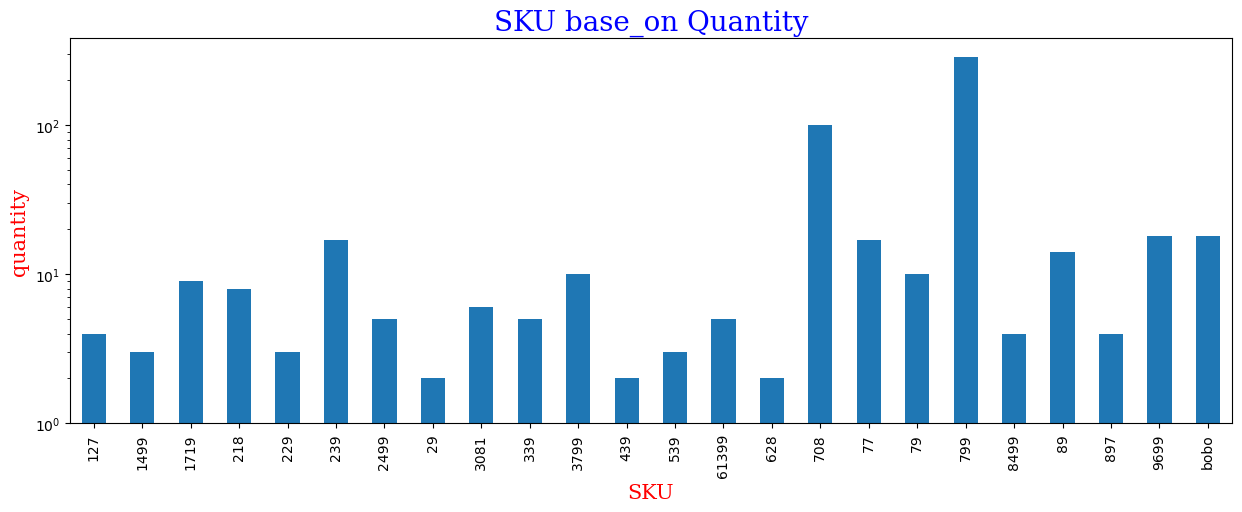

In [24]:
# showing the top ordered SKU for customers
highest_ord_sku = df.groupby(['sku']).quantity.sum()
print(highest_ord_sku)

plt.figure(figsize = (15 ,5))
highest_ord_sku.plot(kind ='bar' , log=True)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.xlabel('SKU', fontdict= font2)
plt.ylabel('quantity' , fontdict=font2)
plt.title('SKU base_on Quantity' , fontdict= font1)

size
2XL          43
3XL          40
4XL           9
L            92
M            93
One Size     52
S             1
XL          203
Name: quantity, dtype: int64


Text(0.5, 1.0, 'Size base_on Quantity')

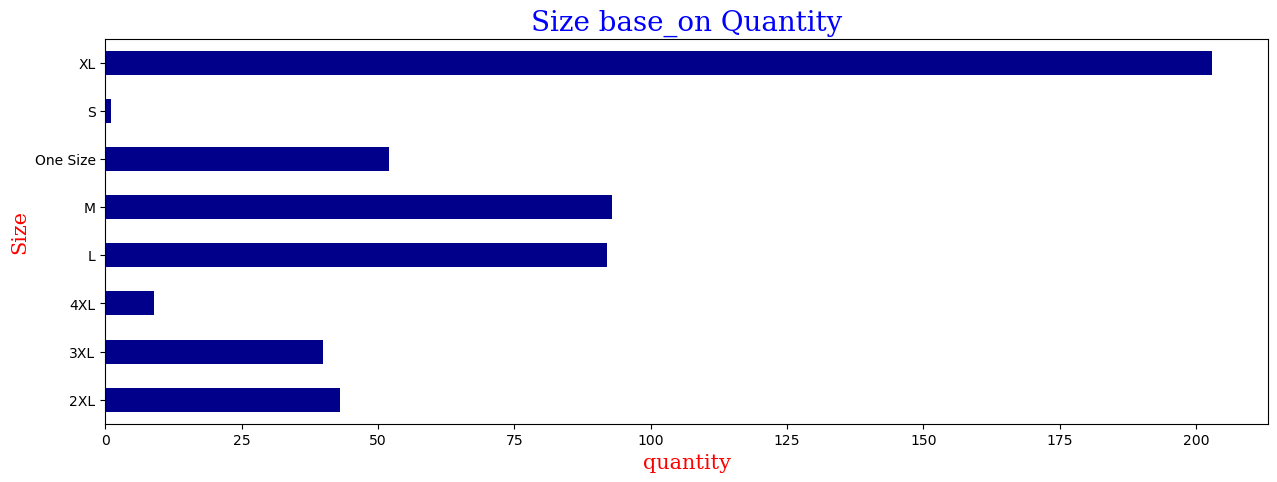

In [25]:
#showing the highest soled size
highest_ord_sku = df.groupby(['size']).quantity.sum()
print(highest_ord_sku)

plt.figure(figsize = (15 ,5))
highest_ord_sku.plot(kind ='barh',color='darkblue', log=False)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'red','size':15}

plt.ylabel('Size', fontdict= font2)
plt.xlabel('quantity' , fontdict=font2)
plt.title('Size base_on Quantity' , fontdict= font1)

sku
127        714
1499       574
1719      2052
218       2204
229        414
239       4199
2499       962
29         227
3081       990
339       1084
3799      2390
439        258
539        536
61399     1112
628        268
708      29146
77        4055
79        2817
799      79182
8499       699
89        3341
897        804
9699      4896
bobo      3595
Name: revenue, dtype: int64


Text(0.5, 1.0, 'Sku base_on Revenue')

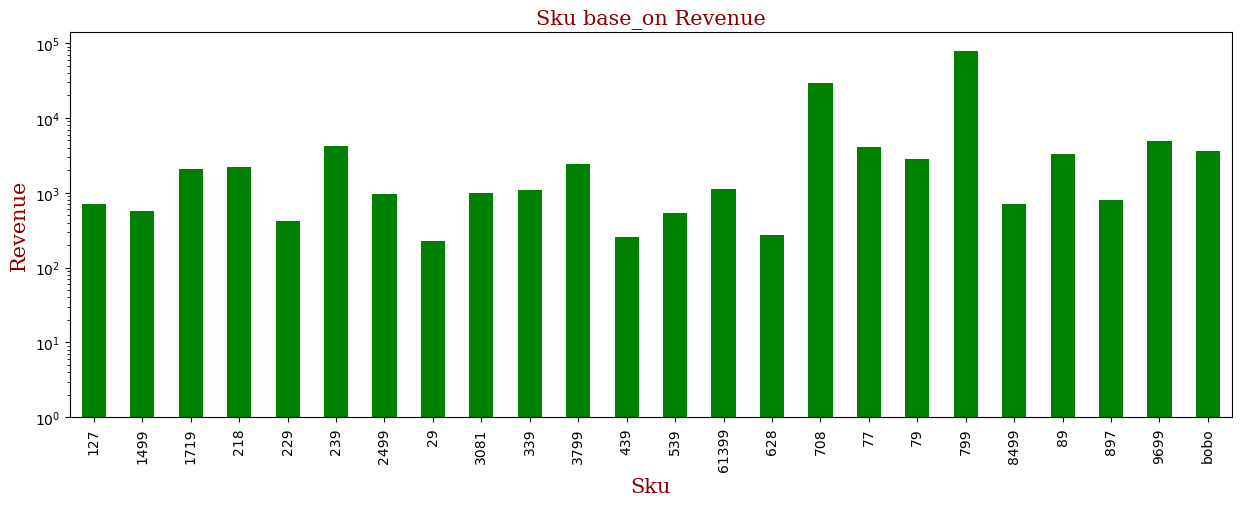

In [26]:
#showing the which sku provied high revenue
highest_ord_sku = df.groupby(['sku']).revenue.sum()
print(highest_ord_sku)

plt.figure(figsize = (15 ,5))
highest_ord_sku.plot(kind ='bar',color='green', log=True)

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel('Sku', fontdict= font2)
plt.ylabel('Revenue' , fontdict=font2)
plt.title('Sku base_on Revenue' , fontdict= font2)

month
6     94
7    116
8    156
9    167
Name: quantity, dtype: int64
month
6    25259
7    32175
8    42513
9    46572
Name: revenue, dtype: int64


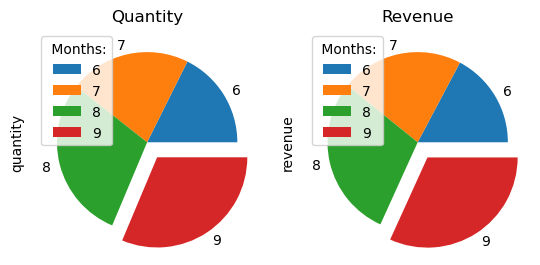

In [27]:
#shwoing how many sku soled throughout these months

month_ord = df.groupby(['month']).quantity.sum()
print(month_ord)


mexplode=[0,0,0,0.2]

plt.subplot(1,2,1)
month_ord.plot(kind='pie', legend =True , explode=mexplode)
plt.title('Quantity')
plt.legend(title = " Months:" , loc='upper left')


month_ren = df.groupby(['month']).revenue.sum()
print(month_ren)


plt.subplot(1,2,2)
month_ren.plot(kind='pie', legend =True  , explode=mexplode)
plt.title('Revenue')
plt.legend(title = " Months:" , loc='upper left')






Text(0, 0.5, 'Revenue')

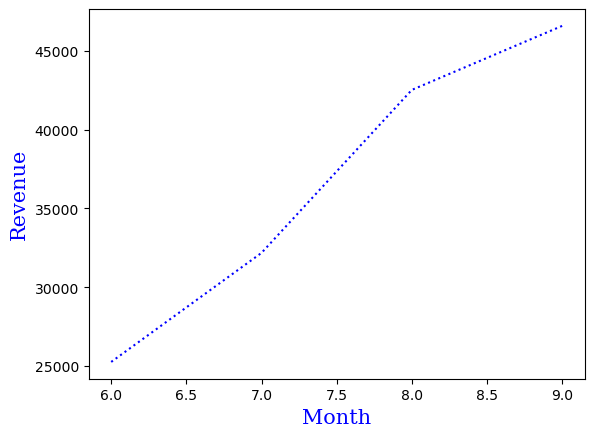

In [28]:
month_ren = df.groupby(['month']).revenue.sum()

font1 = {'family':'serif','color':'blue','size':15}


month_ren.plot(linestyle='dotted' , color='blue')

plt.xlabel("Month" , fontdict=font1)
plt.ylabel("Revenue" ,  fontdict=font1)
